# Verificando as hipóteses da Regressão Linear em Python e R
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

In [3]:
import pandas as pd 
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)

#O foco é verificar as hipóteses da regressão linear, 
#vamos dropar a variável CHAS a qual é categórica apenas pela didática

X.drop('CHAS', axis = 1, inplace = True)

#Variável resposta é o valor da mediana dos valores das casas em vários bairros de Boston
y = pd.Series(boston.target, name = 'MEDV') 


### Visualizar variáveis independentes (vetores coluna que entram na Matriz de Design)

In [5]:
X.sample(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
157,1.22358,0.0,19.58,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
300,0.04417,70.0,2.24,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
87,0.07151,0.0,4.49,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44
124,0.09849,0.0,25.65,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58


### Abordagem canônica de aplicação da regressão linear em Python através do scikit learn 

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Beta coeficientes
print(f'Coeficientes: {lin_reg.coef_}') 
print(f'Intercept: {lin_reg.intercept_}')

#Coeficiente de determinação 
print(f'R^2 score: {lin_reg.score(X,y)}')

Coeficientes: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.89195979693275
R^2 score: 0.7355165089722999


### Para obter um número maior de informações, pode-se utilizar a biblioteca statsmodels
- Quando utilizamos esta biblioteca, precisa-se adicionar um variável do vetor coluna da intersecção

In [9]:
import statsmodels.api as sm

##Adiciona o vetor coluna de 1s na Matriz de Design 
X_constante = sm.add_constant(X)


In [11]:
X_constante.sample(5)

,const,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
221,1.0,0.40771,0.0,6.20,0.5070,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46
216,1.0,0.04560,0.0,13.89,0.5500,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51
64,1.0,0.01951,17.5,1.38,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05
425,1.0,15.86030,0.0,18.10,0.6790,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
448,1.0,9.32909,0.0,18.10,0.7130,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13


In [14]:
# Aplicação da regressão linear com a biblioteca statsmodels
lin_reg = sm.OLS(y, X_constante).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          7.30e-134
Time:                        21:58:12   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### A Hipótese Nula na Regressão Linear diz que o coeficiente é nulo, portanto se o Valor-P calculado para o coeficiente for menor que 0,05 (assumido esse nível de significância), rejeita-se a hipótese nula e o coeficiente é diferente de zero

##### De acordo com o Teorema de Gauss Markov, em uma regressão linear, a aplicação do métodos dos mínimos quadrados resulta no BLUE (Best Linear Unbiased Estimator) se:
- A média dos erros (dos resíduos) é zero
- Os resíduos não são correlacionados: $Cov(e_1, e_2, ..., e_p) = 0$
- Homocedasticidade dos erros, ou seja, possuem igual variância $Var(e_1 = e_2 = ... = e_p)$

##### Os resíduos NÃO precisam seguir uma distribuição normal

### Na regressão linear deseja-se que o gráfico de valores observados x valores preditos siga uma diagonal e resíduos x valores preditos seja igual distribuído ao redor de uma linha horizontal, e quanto mais perto da linha horizontal, menor os valores absolutos dos resíduos ( do erro)

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [28]:
def linearity_test(model, y):
    
    '''Função para inspecionar visualmente a hipótese de linearidade em uma regressão linear 
    A função plota os valores observados pelos preditos e os resíduos vs preditos
    
    Argumentos:
    * model - Modelo treinado a partir da api statsmodels, que utiliza o método dos mínimos quadrados (OLS) para obtenção do BLUE 
    * y - valores observados
    '''
    
    fitted_vals = model.predict() # Valores preditos
    resids = model.resid #Retorna os resíduos para cada observação
    
    # Inicialização dos objetos figura e eixos
    # Utilização de 1 linha e duas colunas (como o facet_grid no ggplot permite)
    fig, ax = plt.subplots(1,2) 
    
    # Para plotar os dados e a regressão linear
    sns.regplot(x = fitted_vals, y = y, lowess = True, ax = ax[0], line_kws={'color':'red'})
    #lowess stands for Locally Weighted scatterplot smoothing, a qual combina múltiplos modelos de regressão com KNN
    # Não paramétrica, também conhecida como Savitzky-Golay (Smoothing, Origin)
    ax[0].set_title('Valores Observados vs. Valores Preditos', fontsize=16)
    ax[0].set(xlabel = 'Preditos', ylabel = 'Observados')
    
    sns.regplot(x = fitted_vals, y=resids, lowess= True, ax = ax[1], line_kws = {'color':'red'})
    ax[1].set_title('Resíduos vs. Valores Preditos')
    ax[1].set(xlabel = 'Preditos', ylabel = 'Resíduos')

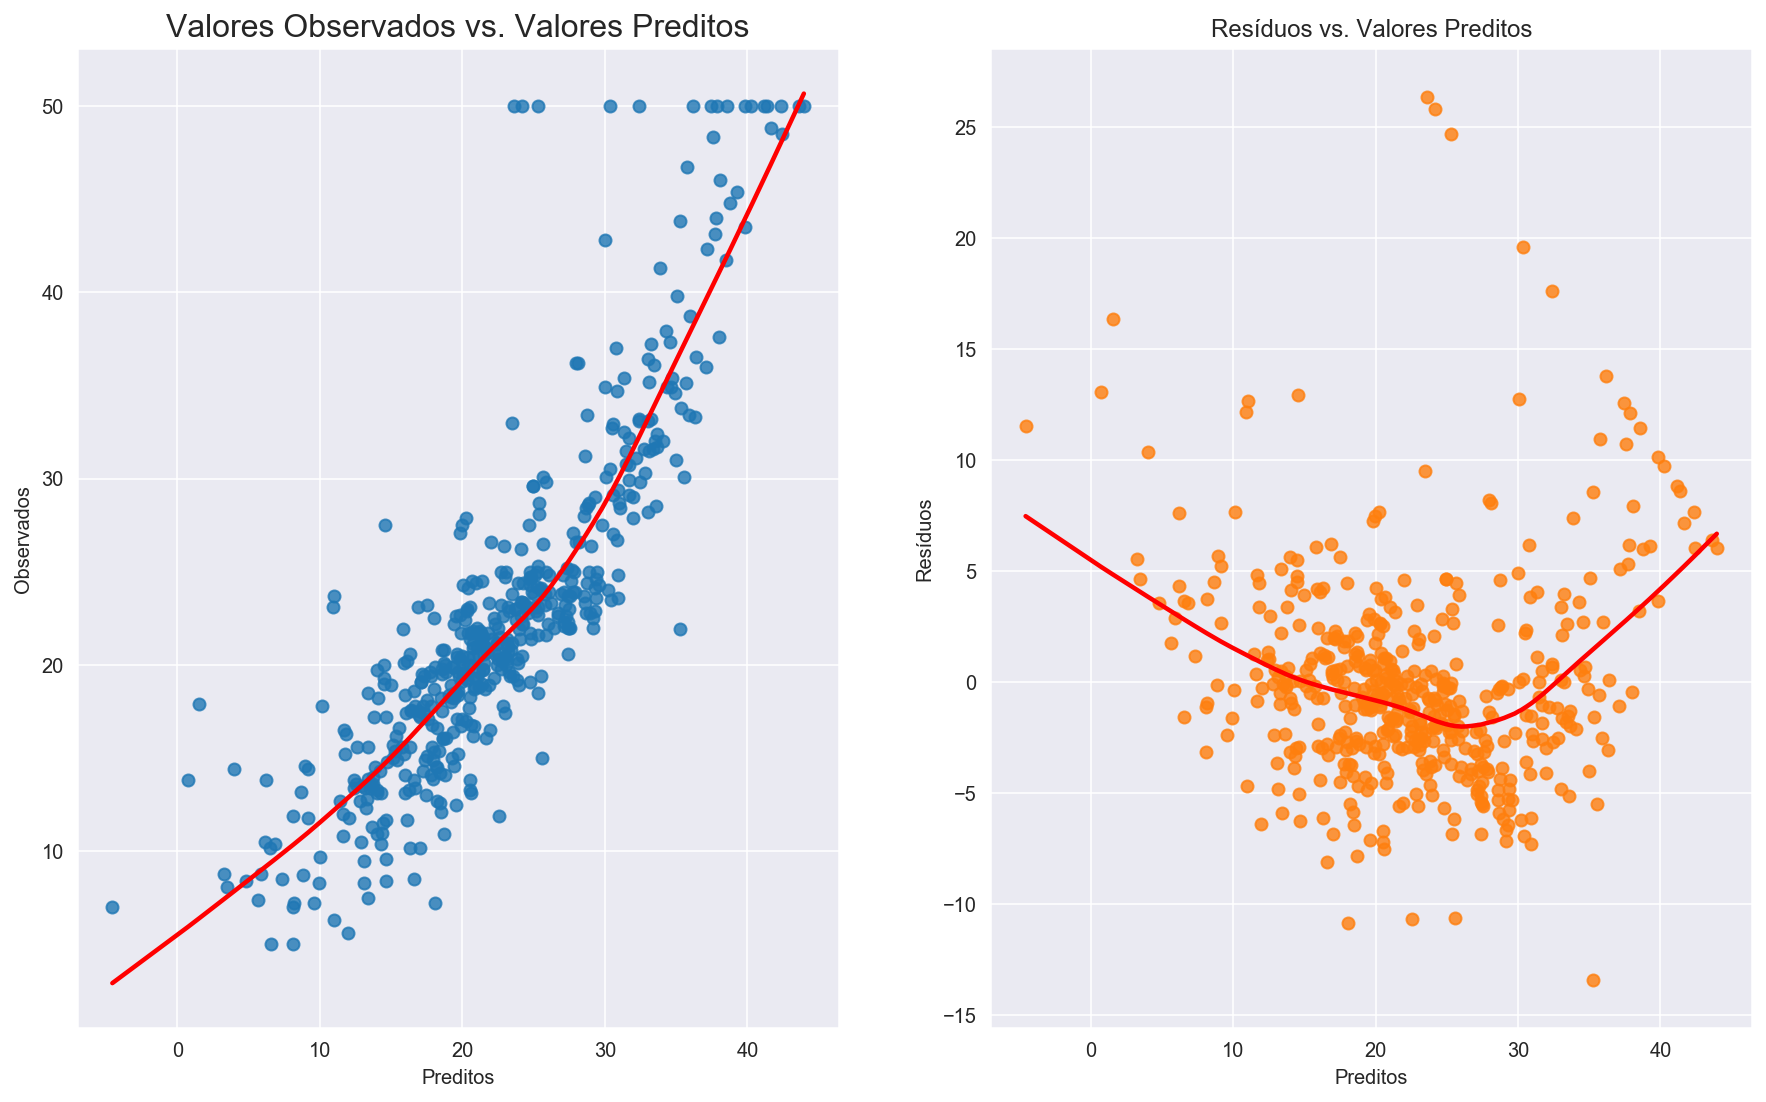

In [29]:
linearity_test(lin_reg, y)

- Verifica-se neste caso que a hipótese de linearidade não é respeitada

# ADICIONAR SOLUÇÕES

### Verificar se a média dos resíduos é zero:

In [30]:
lin_reg.resid.mean()

-3.3929819867200436e-14

-- CONTINUAR